# Empirical study of $ETD(\lambda,\beta)$

In the last presentation, I studied the theoretical properties of a generalization of the ETD algortithm with the paper *Generalized Emphatic Temporal Difference Learning: Bias-Variance Analysis* from Hallak, Tamar, Munos and Mannor (2015). 

In this work, I implement the algorithm on examples to observe the properties proved in the paper and compare them with other TD methods. 

The new algorithm proposed in the paper, $ETD(\lambda,\beta)$ is a generalization of $ETD(\lambda)$ in the sense that the decay factor over the importance sampling ratio in the update of the followon trace is now a free parameter. They show that it is a parameter that controls the bias-variance trade-off. 

# $$\text{Bias bound } ETD(0,\beta)$$

**Corollary 1 from the paper**
$$ || \varPhi^T \theta^* - V^{\pi} ||_f \leq \frac{1}{\sqrt{1-\frac{\gamma^2}{\beta}(1-\kappa)}} || \Pi_f V^{\pi} - V^{\pi} ||_f $$

$$ || \varPhi^T \theta^* - V^{\pi} ||_{d_{\mu}} \leq \frac{1}{\sqrt{\gamma(1-\frac{\gamma^2}{\beta}(1-\kappa))}} || \Pi_f V^{\pi} - V^{\pi} ||_f $$

$ || \Pi_f V^{\pi} - V^{\pi} ||_f $: best approximation we can hope for.

This bias bound exists for all behavior policies. However, for algorithms such that standard TD(0) or GTD algorithm, the bias might be infinite. I try to highlight this fact in the following experiments. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import environment
import policies
import algorithm
import experiments

## 2 states experiments

I tested the $ETD(0,\beta)$ algorithm first on the 2 states experiments where there is a reward of 1 for all the left movements. 

## True values of the value function

In [8]:
a = np.array([[0.955,-0.045],[0.045,-0.955]])
b = np.array([[0.5],[0.525]])
v_true = np.linalg.solve(a, b)
v_true

array([[ 0.49876374],
       [-0.52623626]])

In [41]:
# definition of the problem
n_states = 2
eps = 0.2
p = 0.95
Phi = np.array([[1],[-1 + eps]])
actions = ['left','right']
proba_mu= [p,1-p]
proba_pi = [0.5,0.5]
alpha = 0.001
gamma = 0.9
D_pi = np.diag(np.array(proba_pi))
beta = 0.8

In [45]:
value_runs_mses,value_runs_thetas,value_runs_thetas_av,value_runs_mses_av = experiments.runs2(n_states,Phi,actions,proba_mu,proba_pi,D_pi,v_true,alpha,beta,gamma,20,7000)

run 1 done
run 2 done
run 3 done
run 4 done
run 5 done
run 6 done
run 7 done
run 8 done
run 9 done
run 10 done
run 11 done
run 12 done
run 13 done
run 14 done
run 15 done
run 16 done
run 17 done
run 18 done
run 19 done
run 20 done


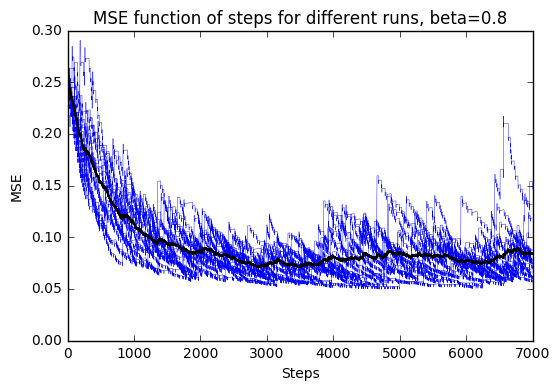

In [50]:
for i in range(20) : 
    plt.plot(range(7000),value_runs_mses[i],label=i,linewidth=0.3,color = 'blue')
plt.plot(range(7000),value_runs_mses_av,label='Averaged',linewidth = 1.5,color = 'black')
plt.ylabel('MSE')
plt.xlabel('Steps')
plt.title('MSE function of steps for different runs, beta=%s'%beta)
plt.show()

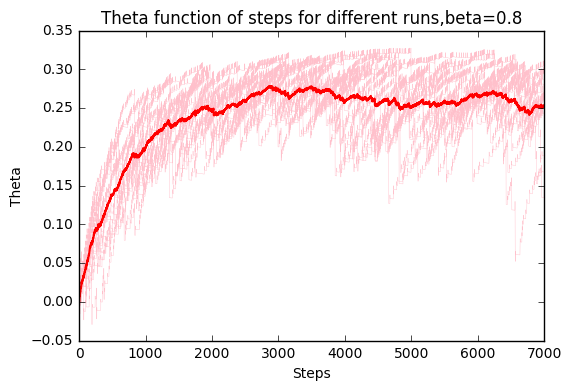

In [51]:
for i in range(20) : 
    plt.plot(range(7001),value_runs_thetas[i],label=i,linewidth=0.3,color = 'pink')
plt.plot(range(7001),value_runs_thetas_av,label='Averaged',linewidth = 1.5,color = 'red')
plt.ylabel('Theta')
plt.xlabel('Steps')
plt.title('Theta function of steps for different runs,beta=%s'%beta)
plt.show()

## MSE function beta values

In [55]:
mses_beta = dict()
thetas_beta = dict()
for beta2 in list(np.arange(0.5,1.,0.05)):
    print beta2,'being done'
    value_runs_mses,value_runs_thetas,value_runs_thetas_av,value_runs_mses_av = experiments.runs2(n_states,Phi,actions,proba_mu,proba_pi,D_pi,v_true,alpha,beta2,gamma,20,7000)
    mses_beta[beta2] = value_runs_mses
    thetas_beta[beta2] = value_runs_thetas

0.5 being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
	 run 10 being done
	 run 11 being done
	 run 12 being done
	 run 13 being done
	 run 14 being done
	 run 15 being done
	 run 16 being done
	 run 17 being done
	 run 18 being done
	 run 19 being done
0.55 being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
	 run 10 being done
	 run 11 being done
	 run 12 being done
	 run 13 being done
	 run 14 being done
	 run 15 being done
	 run 16 being done
	 run 17 being done
	 run 18 being done
	 run 19 being done
0.6 being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 r

In [60]:
mses_beta_per_run = dict()
for i in range(20) : 
    mses_betas = []
    for beta2 in list(np.arange(0.5,1.,0.05)):
        mse2 = mses_beta[beta2][i][-1]
        mses_betas.append(mse2)
    mses_beta_per_run[i] = mses_betas
mses_betas_av = experiments.means_dict(mses_beta_per_run)

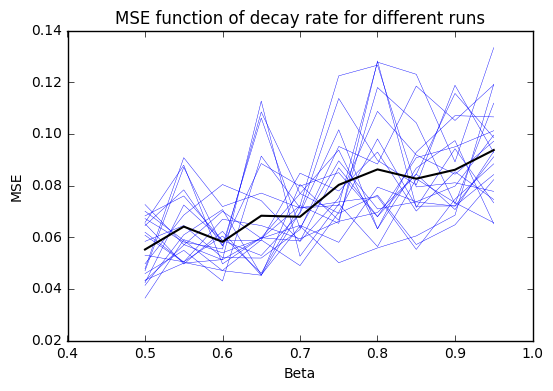

In [61]:
for i in range(20) : 
    plt.plot(list(np.arange(0.5,1.,0.05)),mses_beta_per_run[i],label=i,linewidth=0.3,color = 'blue')
plt.plot(list(np.arange(0.5,1.,0.05)),mses_betas_av,label='averaged',linewidth = 1.5,color = 'black')
plt.ylabel('MSE')
plt.xlabel('Beta')
plt.title('MSE function of decay rate for different runs')
plt.show()

In this case, the error is increasing with the decay rate factor. Then, it is not optimal to chose it equel to the discount factor, especially when the latter tends towards 1.